In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("benjaminawd/new-york-times-articles-comments-2020")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/new-york-times-articles-comments-2020


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load datasets
comments = pd.read_csv("/kaggle/input/new-york-times-articles-comments-2020/nyt-comments-2020.csv")
articles = pd.read_csv("/kaggle/input/new-york-times-articles-comments-2020/nyt-articles-2020.csv")

# Merge for enriched data
df = comments.merge(articles, left_on="articleID", right_on="uniqueID", how="left")


/tmp/ipykernel_31/1480897808.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv("/kaggle/input/new-york-times-articles-comments-2020/nyt-comments-2020.csv")


/tmp/ipykernel_31/3473681900.py:10: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


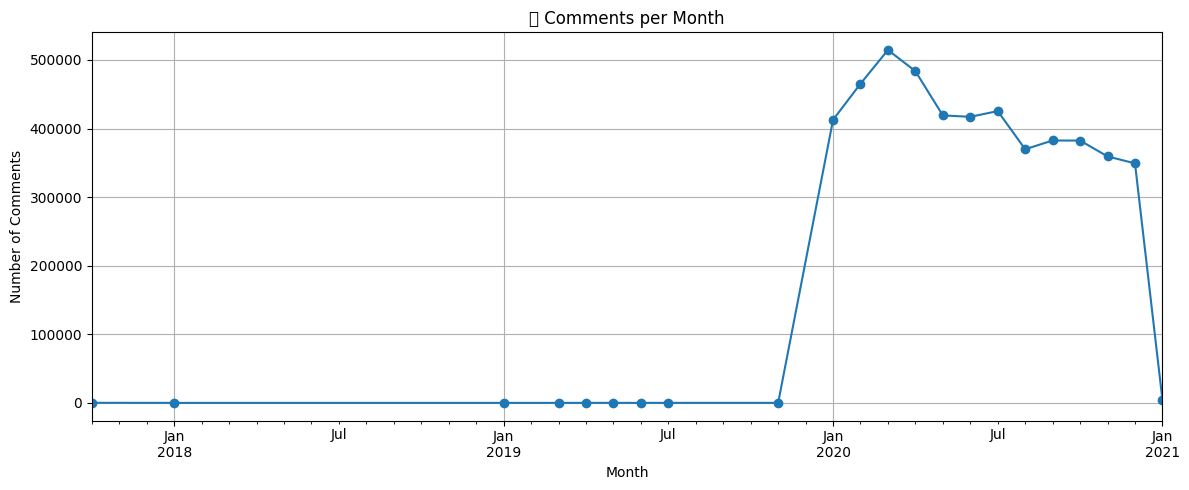

In [4]:
df['createDate'] = pd.to_datetime(df['createDate'])
df['month'] = df['createDate'].dt.to_period("M")

monthly_counts = df.groupby('month').size()

monthly_counts.plot(kind='line', marker='o', figsize=(12, 5), title="📅 Comments per Month")
plt.ylabel("Number of Comments")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_31/4095105571.py:8: UserWarning: Glyph 128240 (\N{NEWSPAPER}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128240 (\N{NEWSPAPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


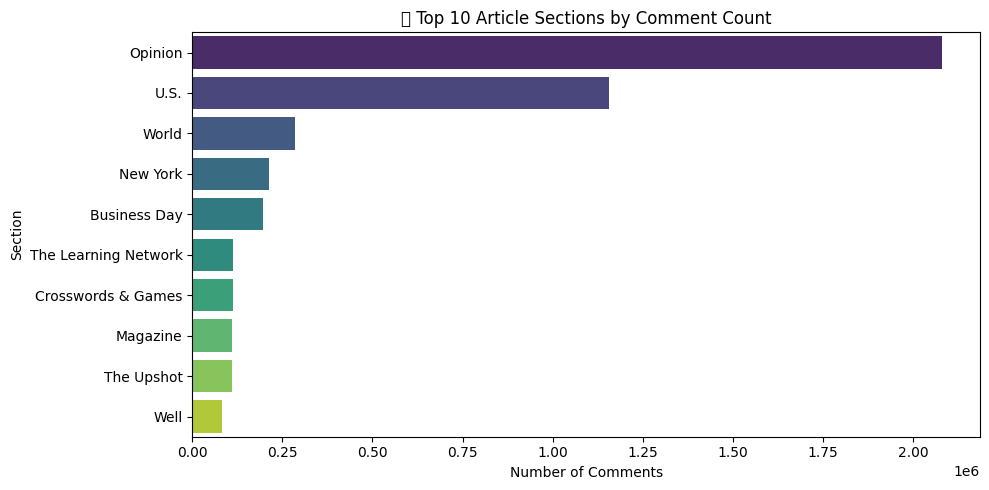

In [5]:
top_sections = df['section'].value_counts().nlargest(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_sections.values, y=top_sections.index, palette="viridis")
plt.title("📰 Top 10 Article Sections by Comment Count")
plt.xlabel("Number of Comments")
plt.ylabel("Section")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_31/746046397.py:6: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


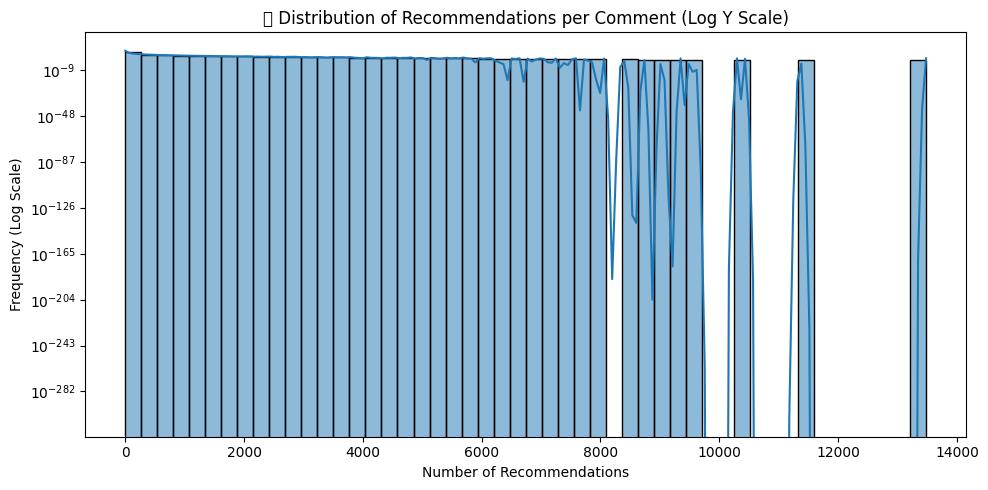

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(df['recommendations'].dropna(), bins=50, kde=True, log_scale=(False, True))
plt.title("👍 Distribution of Recommendations per Comment (Log Y Scale)")
plt.xlabel("Number of Recommendations")
plt.ylabel("Frequency (Log Scale)")
plt.tight_layout()
plt.show()


/tmp/ipykernel_31/2315229431.py:8: UserWarning: Glyph 128221 (\N{MEMO}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


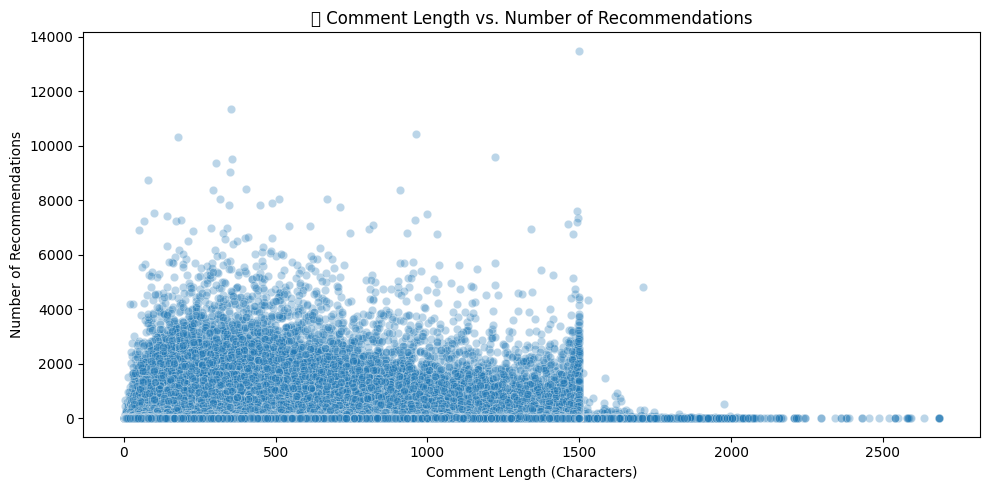

In [7]:
df['commentLength'] = df['commentBody'].fillna('').apply(len)

plt.figure(figsize=(10,5))
sns.scatterplot(x=df['commentLength'], y=df['recommendations'], alpha=0.3)
plt.title("📝 Comment Length vs. Number of Recommendations")
plt.xlabel("Comment Length (Characters)")
plt.ylabel("Number of Recommendations")
plt.tight_layout()
plt.show()


/tmp/ipykernel_31/3064016569.py:20: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


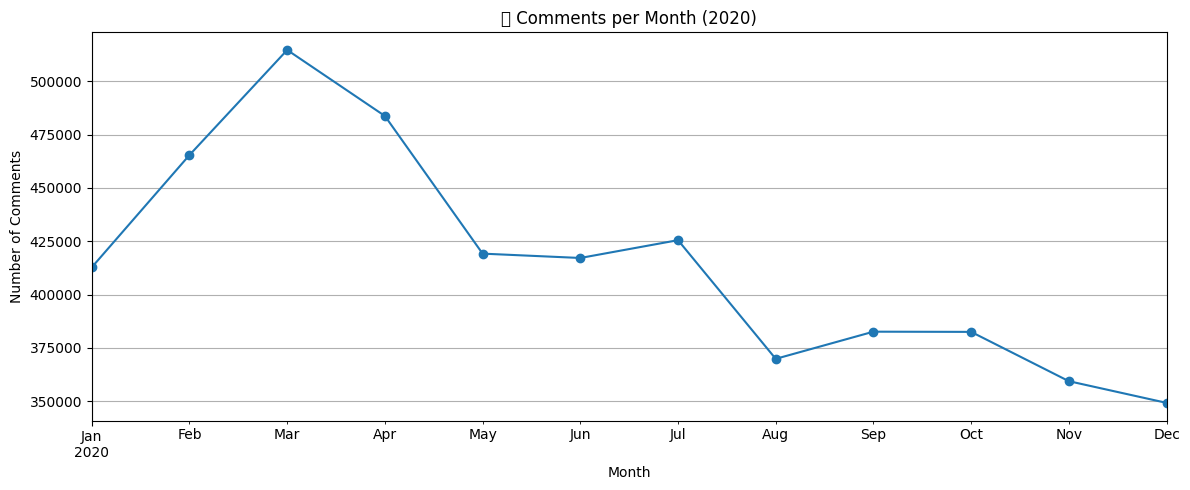

In [4]:
import matplotlib.pyplot as plt

# Ensure datetime conversion
df['createDate'] = pd.to_datetime(df['createDate'])

# Filter for 2020 only
df_2020 = df[df['createDate'].dt.year == 2020].copy()

# Extract month period
df_2020['month'] = df_2020['createDate'].dt.to_period("M")

# Group by month
monthly_counts = df_2020.groupby('month').size()

# Plot
monthly_counts.plot(kind='line', marker='o', figsize=(12, 5), title="📅 Comments per Month (2020)")
plt.ylabel("Number of Comments")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
print(articles.columns.tolist())


['newsdesk', 'section', 'subsection', 'material', 'headline', 'abstract', 'keywords', 'word_count', 'pub_date', 'n_comments', 'uniqueID']


In [6]:
print(articles['headline'].iloc[0])



Protect Veterans From Fraud


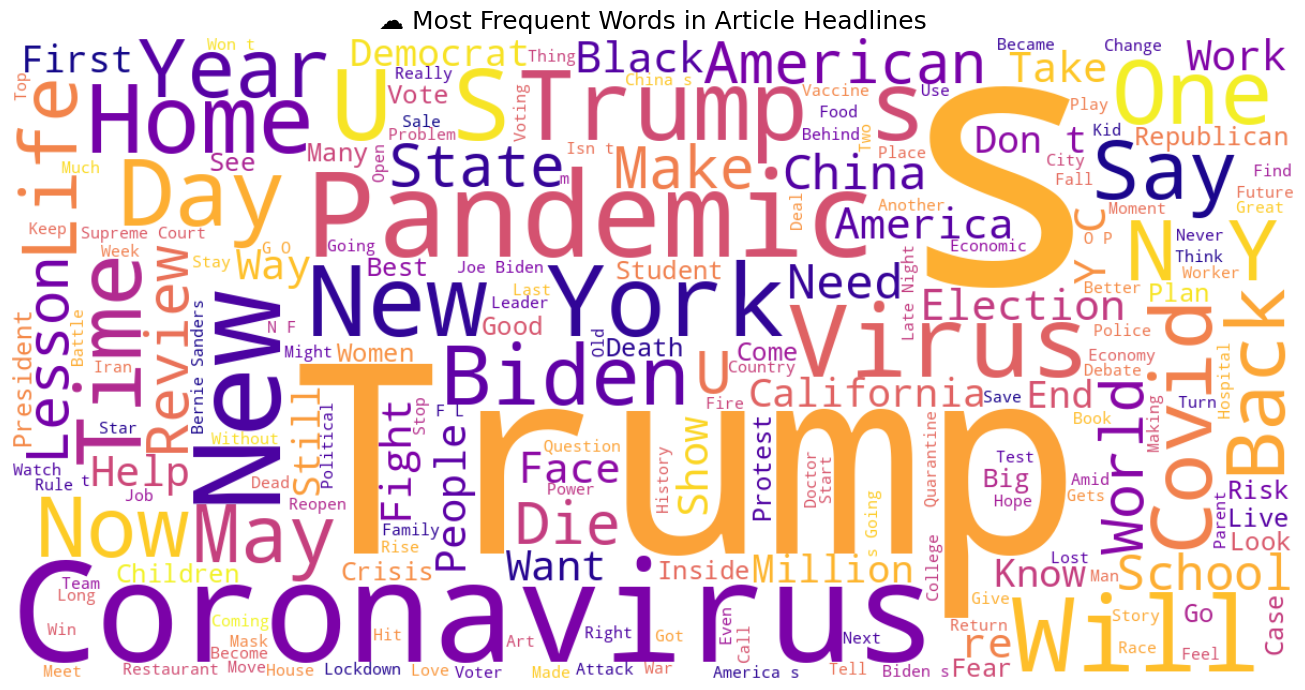

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Drop NaN headlines and combine
headline_text = ' '.join(articles['headline'].dropna().tolist())

# Generate word cloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    max_words=200,
    colormap='plasma'
).generate(headline_text)

# Plot
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("☁️ Most Frequent Words in Article Headlines", fontsize=18)
plt.tight_layout()
plt.show()


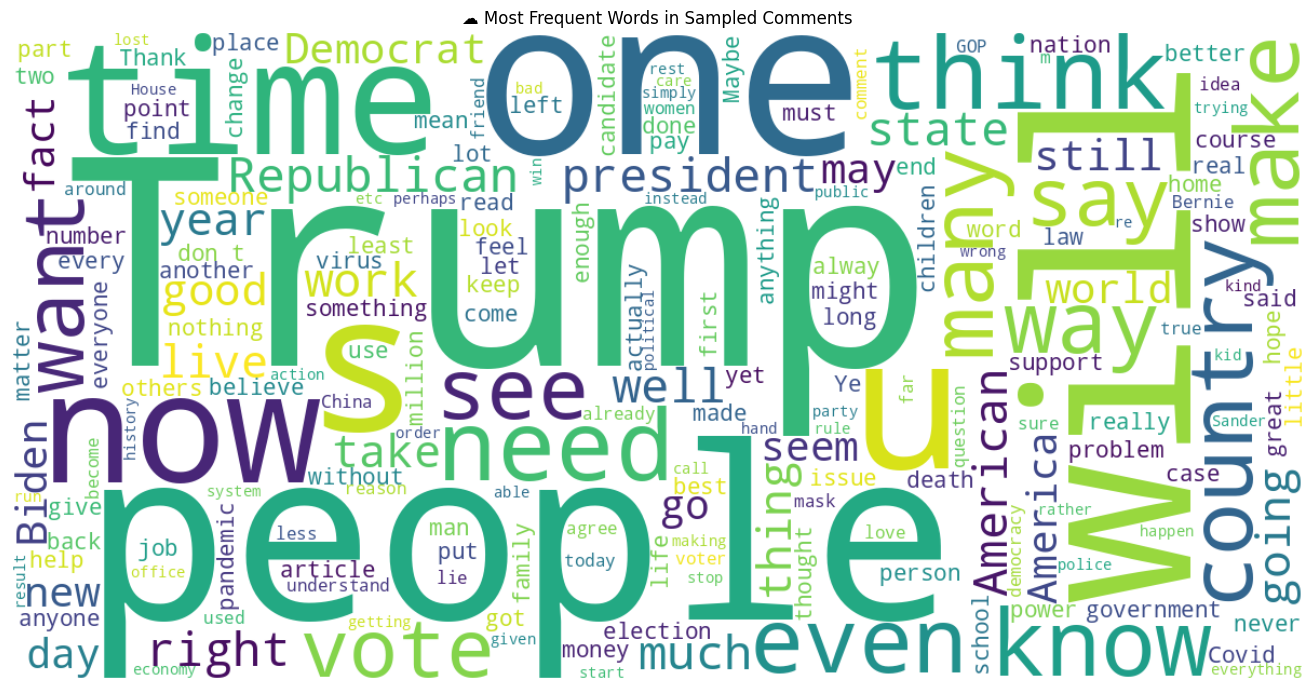

In [10]:
# Sample 50,000 comments (adjust number as needed)
sample_text = ' '.join(df['commentBody'].dropna().sample(n=50000, random_state=42).tolist())

wordcloud = WordCloud(width=1200, height=600, background_color='white', max_words=200).generate(sample_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("☁️ Most Frequent Words in Sampled Comments")
plt.tight_layout()
plt.show()


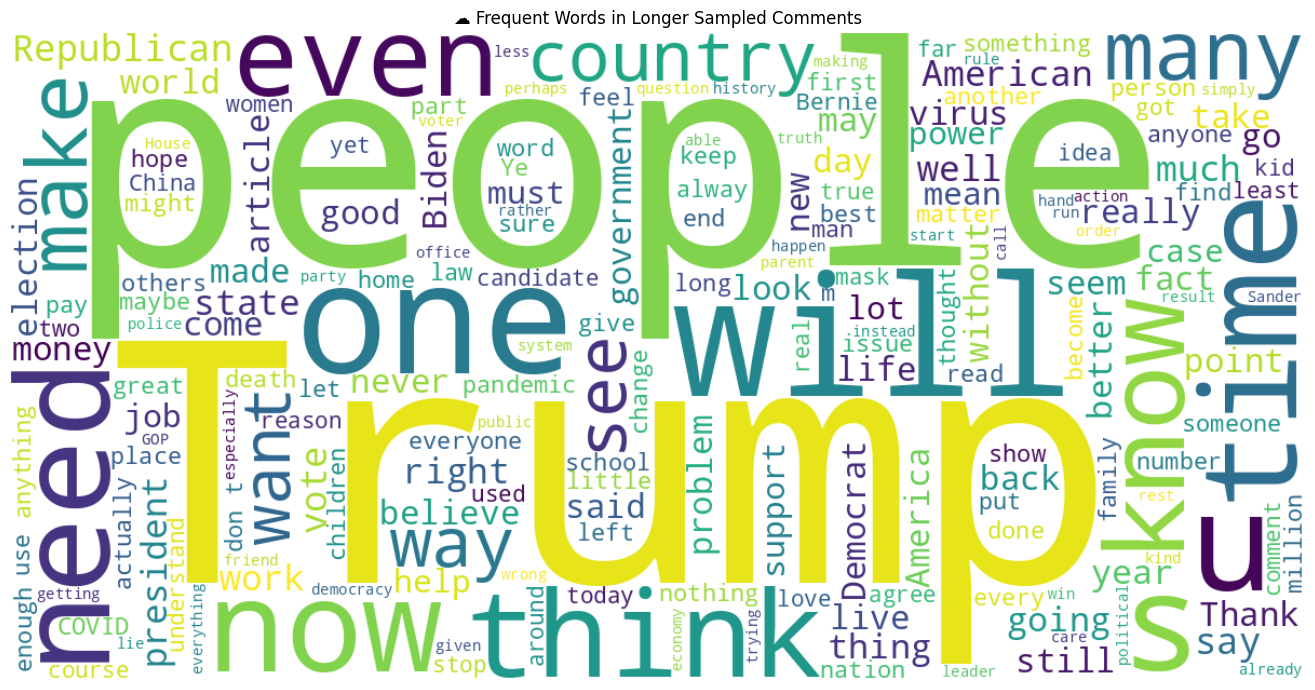

In [9]:
# Filter out short comments and sample
filtered = df['commentBody'].dropna()
filtered = filtered[filtered.str.len() > 20].sample(n=50000, random_state=42)

text = ' '.join(filtered.tolist())
wordcloud = WordCloud(width=1200, height=600, background_color='white', max_words=200).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("☁️ Frequent Words in Longer Sampled Comments")
plt.tight_layout()
plt.show()
